### SMA Lab 6: Detecting communities in large networks using networkx package

#### SWETHA JENIFER 
#### 225229142

In [1]:
pip install networkx==2.5.1

     ---------------------------------------- 1.6/1.6 MB 4.1 MB/s eta 0:00:00
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.4
    Uninstalling networkx-2.8.4:
      Successfully uninstalled networkx-2.8.4
Note: you may need to restart the kernel to use updated packages.


##### Exerxise-1

In [2]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

In [3]:
G_karate = nx.karate_club_graph()
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
print(f"The karate club has {len(communities)} communities.")

The karate club has 3 communities.


In [4]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            G.nodes[v]['community'] = c + 1

In [5]:
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            G.edges[v, w]['community'] = 0

In [6]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [7]:
set_node_community(G_karate, communities)
set_edge_community(G_karate)
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

In [8]:
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

In [9]:
karate_pos = nx.spring_layout(G_karate)
plt.rcParams.update({'figure.figsize': (15, 10)})

In [10]:
nx.draw_networkx(G_karate,pos=karate_pos,node_size=0,edgelist=external,edge_color="silver")

In [11]:
nx.draw_networkx(G_karate,pos=karate_pos,node_color=node_color,edgelist=internal,edge_color=internal_color)

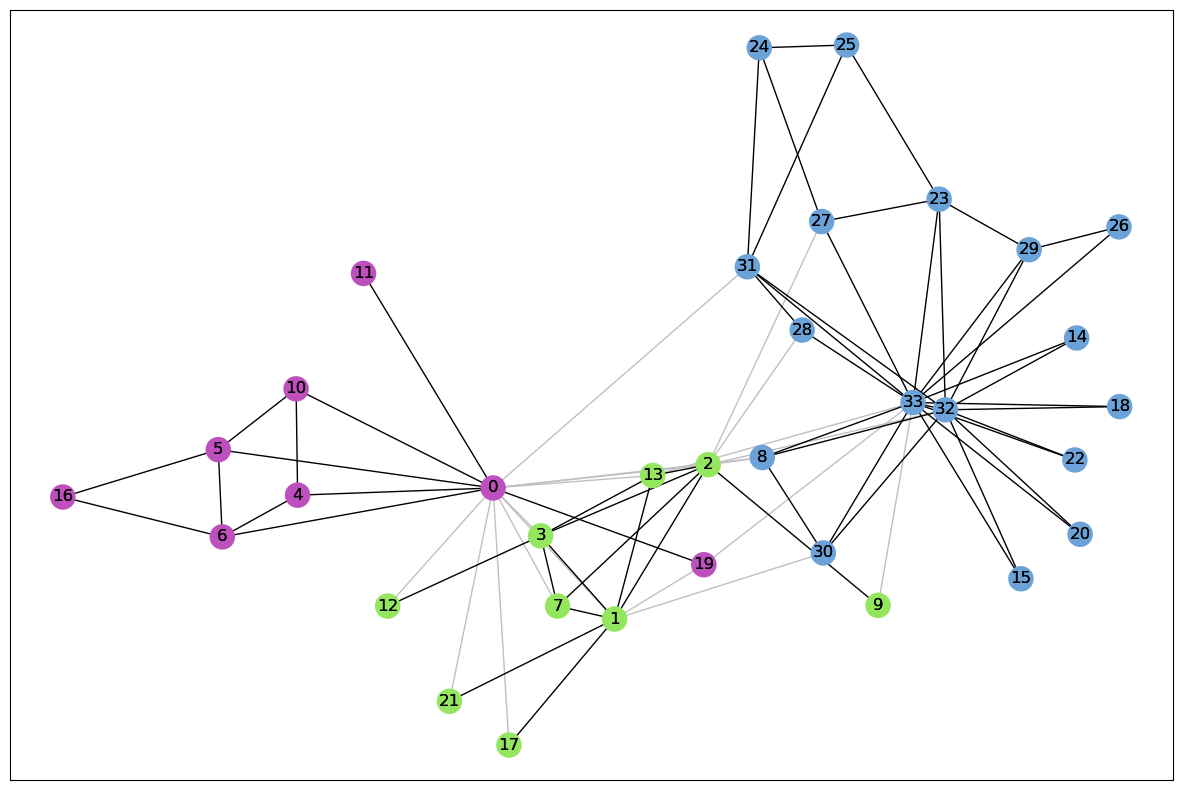

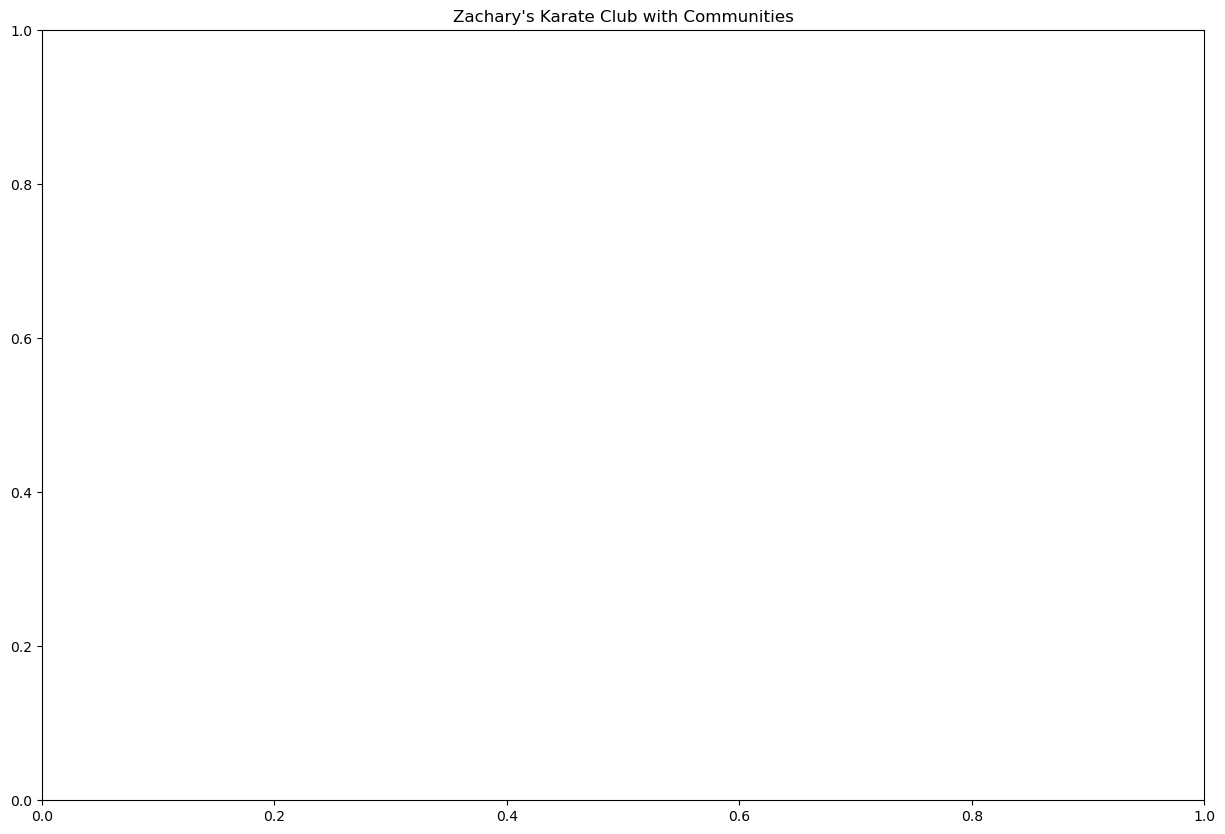

In [12]:
plt.figure(figsize=(15, 10))
plt.title("Zachary's Karate Club with Communities")
plt.show()

##### Exercise - 2 

In [14]:
data_path = 'facebook_combined.txt'
G_social = nx.read_edgelist(data_path)

In [15]:
pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(G_social,pos=pos,node_size=0,edge_color="#444444",alpha=0.05,with_labels=False)

In [16]:
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
len(communities)

13

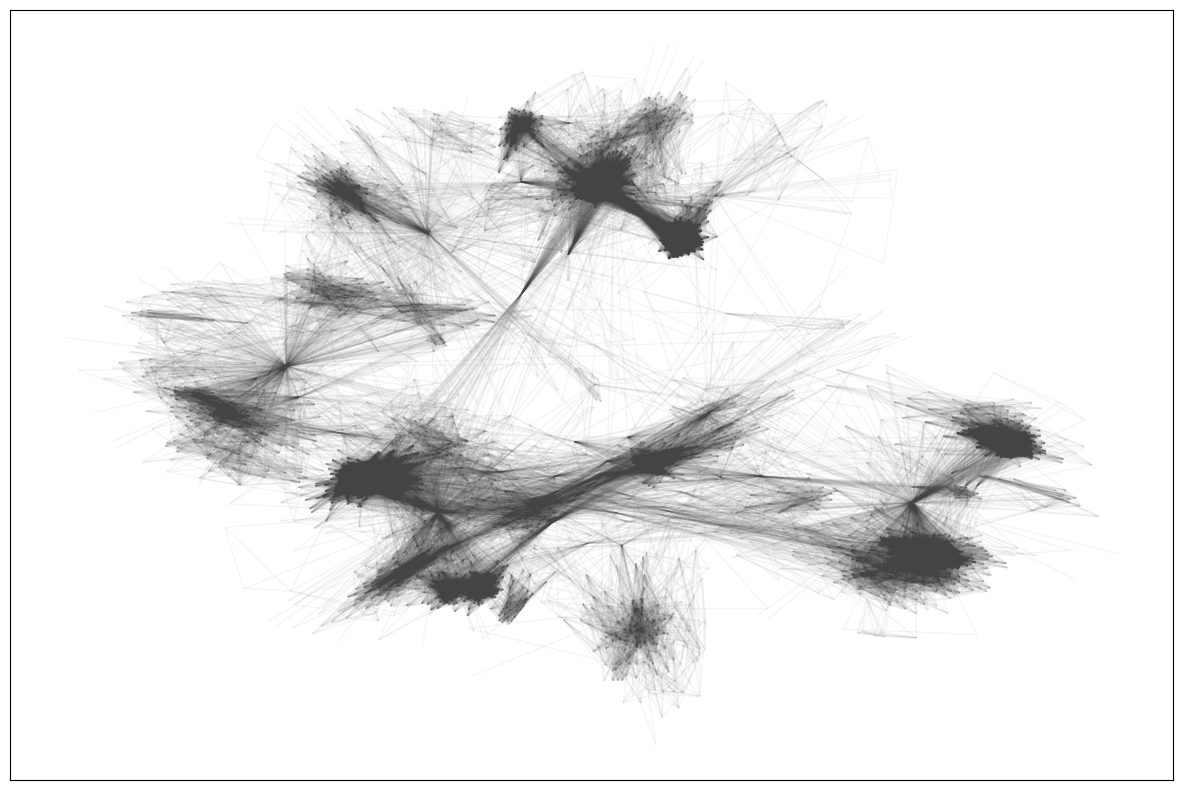

In [17]:
plt.show()

In [18]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
set_node_community(G_social, communities)
set_edge_community(G_social)
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]
nx.draw_networkx(G_social,pos=pos,node_size=0,edgelist=external,edge_color="silver",node_color=node_color,alpha=0.2,with_labels=False)
nx.draw_networkx(G_social, pos=pos,edgelist=internal,edge_color=internal_color,node_color=node_color,alpha=0.05,with_labels=False)

In [19]:
result = nxcom.girvan_newman(G_karate)
communities = next(result)
len(communities)

2

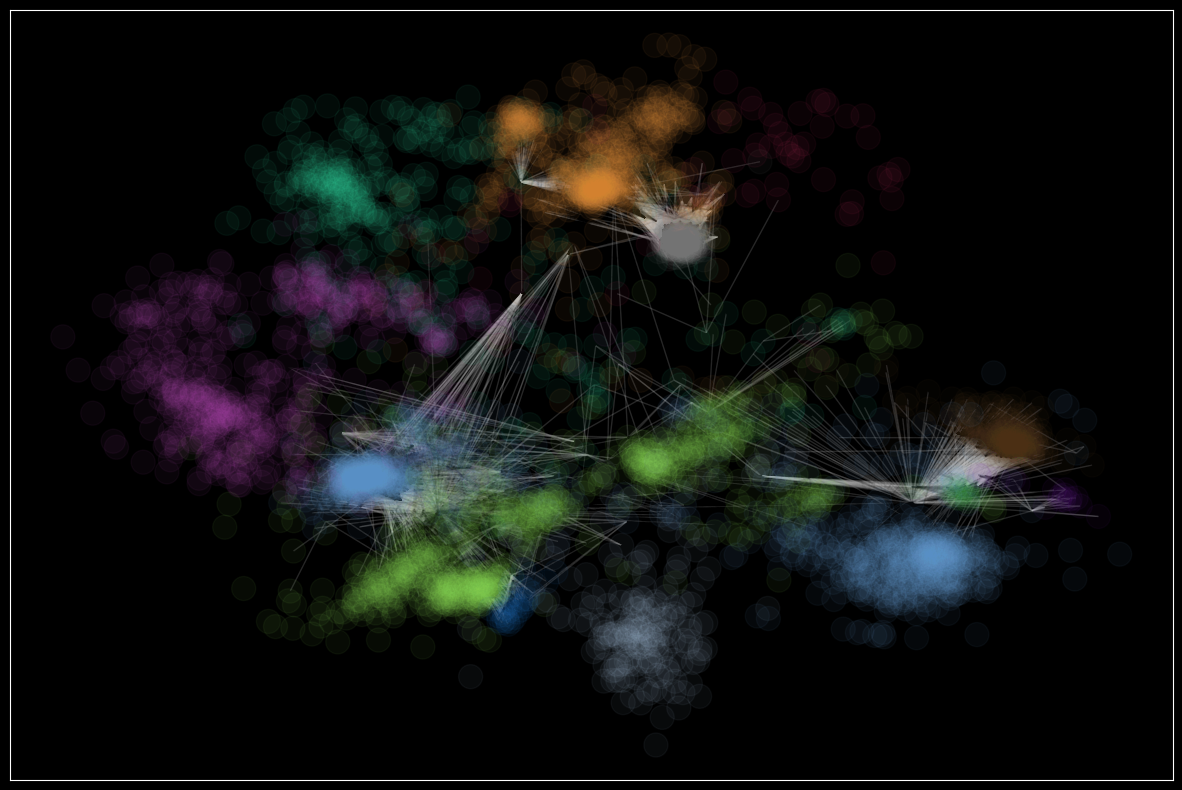

In [20]:
plt.show()

###### GIRVAN-NEWMAN COMMUNITY DETECTION

In [21]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
set_node_community(G_karate, communities)
set_edge_community(G_karate)
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]
karate_pos = nx.spring_layout(G_karate)
nx.draw_networkx(G_karate, pos=karate_pos, node_size=0,edgelist=external, edge_color="#333333", with_labels=False)
nx.draw_networkx(G_karate, pos=karate_pos, node_color=node_color,edgelist=internal, edge_color=internal_color)

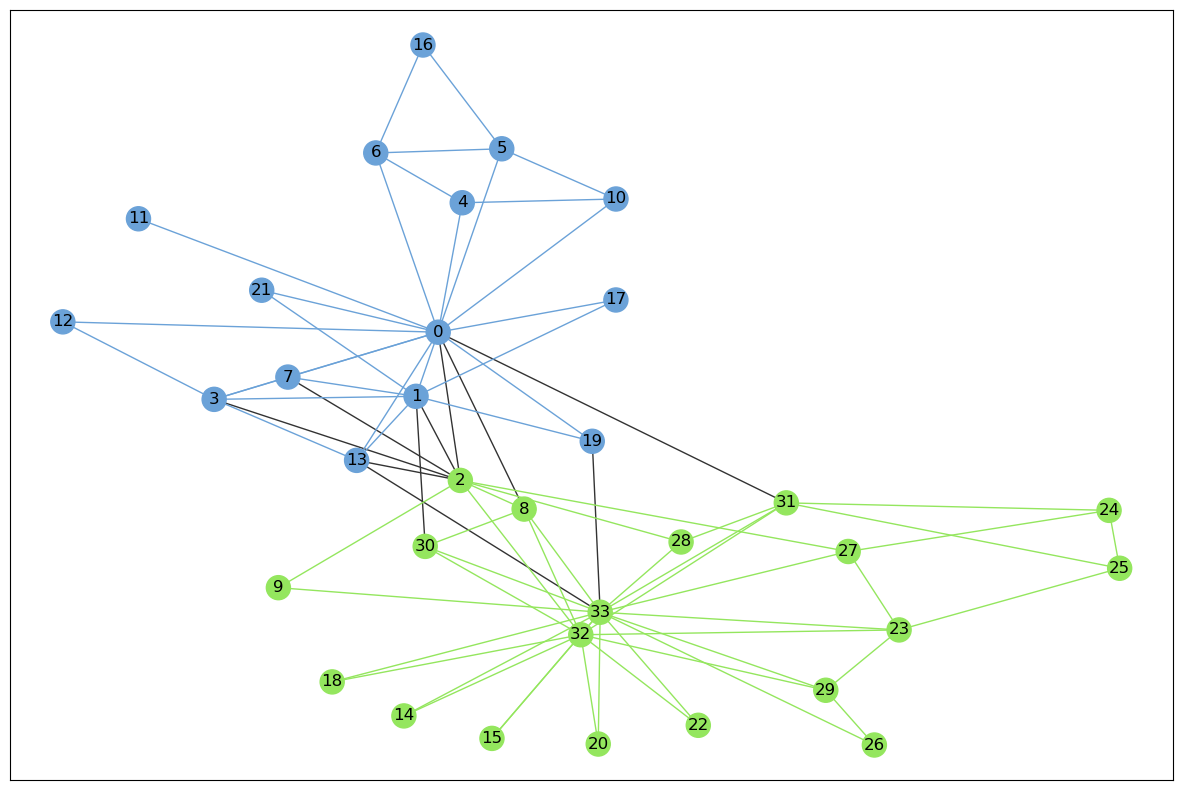

In [22]:
plt.show()

###### CLIQUES

In [23]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
cliques = list(nx.find_cliques(G_karate))
max_clique = max(cliques, key=len)
node_color = [(0.5, 0.5, 0.5) for v in G_karate.nodes()]
for i, v in enumerate(G_karate.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
nx.draw_networkx(G_karate, node_color=node_color, pos=karate_pos)

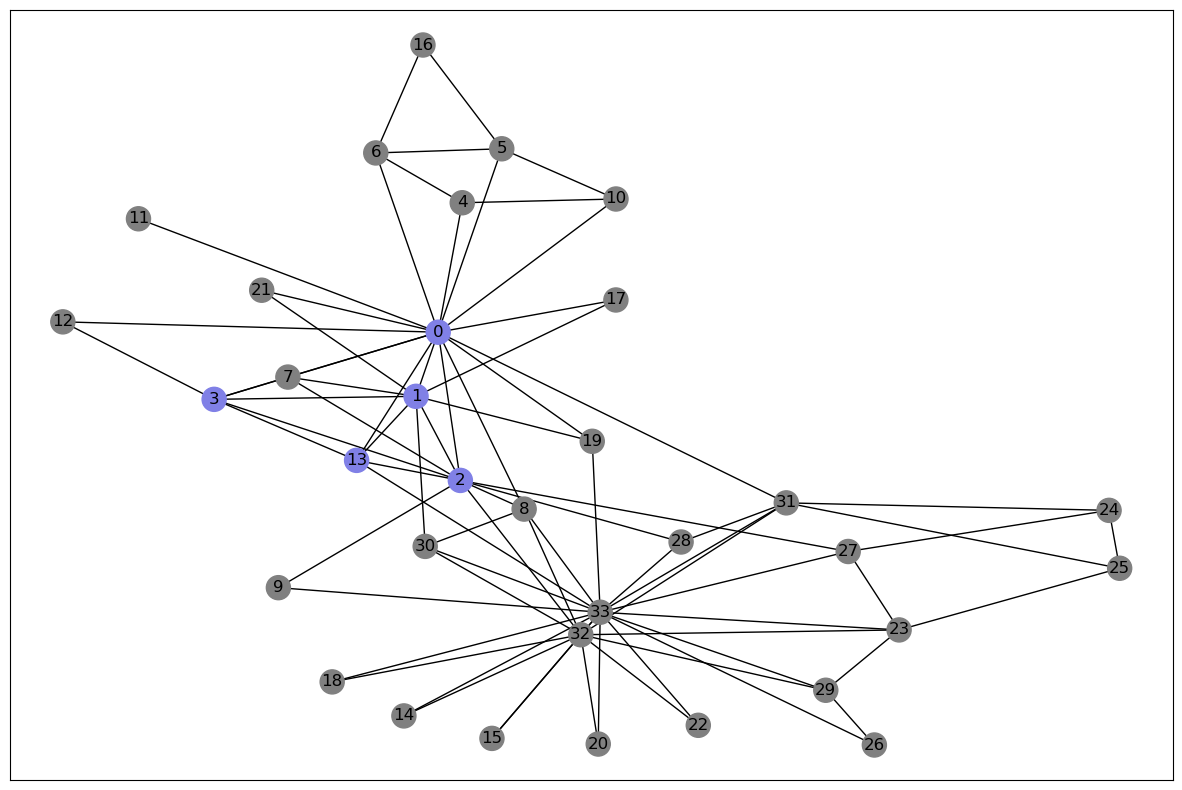

In [24]:
plt.show()

###### K-CORES

In [25]:
G_core_30 = nx.k_core(G_social, 30)
G_core_60 = nx.k_core(G_social, 60)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
pos = nx.spring_layout(G_social, k=0.1)
nx.draw_networkx(G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(G_core_30, pos=pos, node_size=0, edge_color="green", alpha=0.05, with_labels=False)
nx.draw_networkx(G_core_60, pos=pos, node_size=0, edge_color="red", alpha=0.05, with_labels=False)

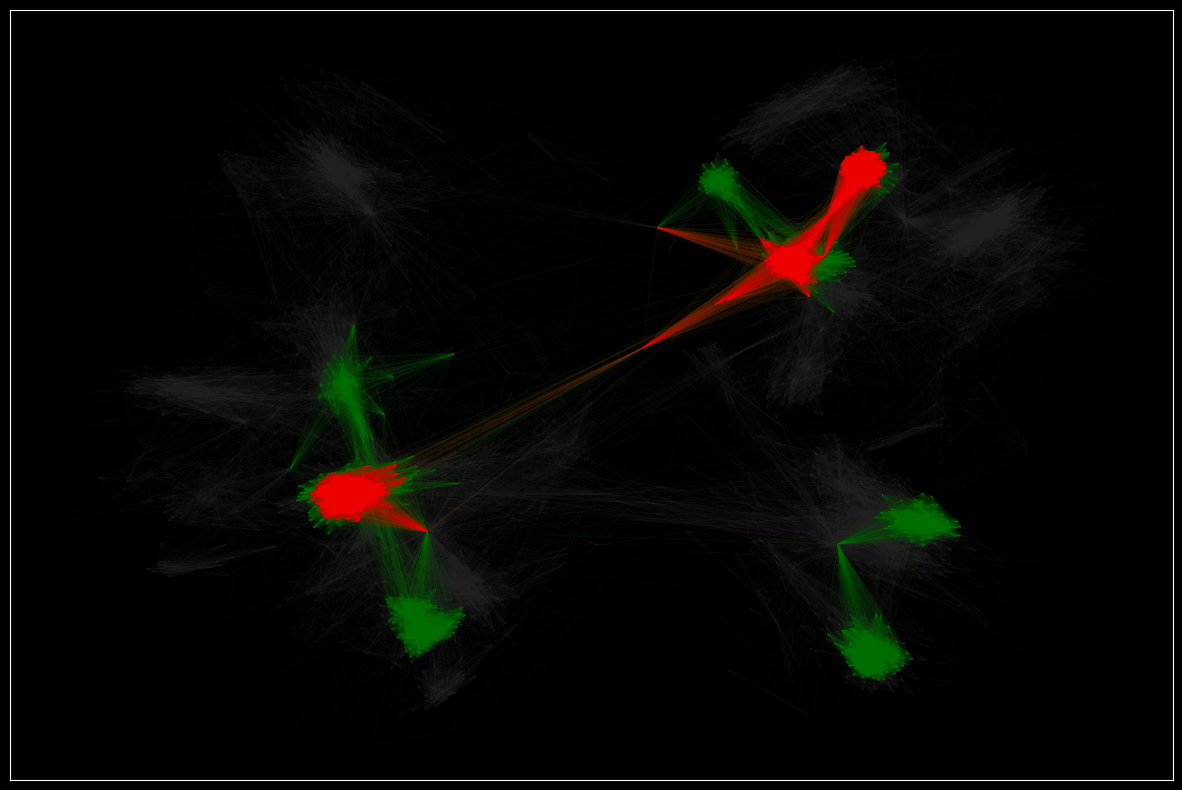

In [26]:
plt.show()